In [495]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1st JAR: DATA

In [496]:
dataset = pd.read_csv('petrol_consumption.csv')

In [497]:
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [498]:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


# 1) Checking for Outliers

In [499]:
iqr = dataset['Petrol_tax'].quantile(0.75) - dataset['Petrol_tax'].quantile(0.25)
upper_threshold = dataset['Petrol_tax'].quantile(0.75) + (1.5 * iqr)
lower_threshold = dataset['Petrol_tax'].quantile(0.25) - (1.5 * iqr)
print('UT  -',round(upper_threshold,3),'LT  -', round(lower_threshold,3))
print('Max -',round(dataset['Petrol_tax'].max(),3),'Min -',round(dataset['Petrol_tax'].min(),3))

UT  - 9.812 LT  - 5.312
Max - 10.0 Min - 5.0


Maximum Petrol Tax is above upper threshold, so will clip the Petrol tax btw Upper Threshold & Lower Threshold

Clipping the Petrol tax btw Upper Threshold & Lower Threshold

In [500]:
dataset.Petrol_tax = dataset.Petrol_tax.clip(lower_threshold, upper_threshold)
dataset.Petrol_tax.describe()

count    48.000000
mean      7.670937
std       0.923415
min       5.312500
25%       7.000000
50%       7.500000
75%       8.125000
max       9.812500
Name: Petrol_tax, dtype: float64

In [501]:
iqr = dataset['Average_income'].quantile(0.75) - dataset['Average_income'].quantile(0.25)
upper_threshold = dataset['Average_income'].quantile(0.75) + (1.5 * iqr)
lower_threshold = dataset['Average_income'].quantile(0.25) - (1.5 * iqr)
print(upper_threshold, lower_threshold)

5838.375 2479.375


Maximum & Minimum Value of Avg Income lies btw Upper Threshold & Lower Threshold value, so no need to clip  

In [502]:
iqr = dataset['Paved_Highways'].quantile(0.75) - dataset['Paved_Highways'].quantile(0.25)
upper_threshold = dataset['Paved_Highways'].quantile(0.75) + (1.5 * iqr)
lower_threshold = dataset['Paved_Highways'].quantile(0.25) - (1.5 * iqr)
print(upper_threshold, lower_threshold)
dataset.Paved_Highways = dataset.Paved_Highways.clip(lower_threshold, upper_threshold)

13224.625 -2958.375


Maximum & Minimum Value of Paved Highways lies btw Upper Threshold & Lower Threshold value, so no need to clip

In [503]:
iqr = dataset['Population_Driver_licence(%)'].quantile(0.75) - dataset['Population_Driver_licence(%)'].quantile(0.25)
upper_threshold = dataset['Population_Driver_licence(%)'].quantile(0.75) + (1.5 * iqr)
lower_threshold = dataset['Population_Driver_licence(%)'].quantile(0.25) - (1.5 * iqr)
print('UT  -',round(upper_threshold,3),'LT  -', round(lower_threshold,3))
print('Max -',round(dataset['Population_Driver_licence(%)'].max(),3),'Min -',round(dataset['Population_Driver_licence(%)'].min(),3))

UT  - 0.693 LT  - 0.432
Max - 0.724 Min - 0.451


Maximum Population_Driver_licence(%) is above upper threshold, so will clip the Population_Driver_licence(%) btw Upper Threshold & Lower Threshold

In [504]:
dataset['Population_Driver_licence(%)'] = dataset['Population_Driver_licence(%)'].clip(lower_threshold, upper_threshold)
dataset['Population_Driver_licence(%)'].describe()

count    48.000000
mean      0.569698
std       0.053823
min       0.451000
25%       0.529750
50%       0.564500
75%       0.595250
max       0.693500
Name: Population_Driver_licence(%), dtype: float64

In [505]:
print('UT  -',round(upper_threshold,3),'LT  -', round(lower_threshold,3))
print('Max -',round(dataset['Population_Driver_licence(%)'].max(),3),'Min -',dataset['Population_Driver_licence(%)'].min())

UT  - 0.693 LT  - 0.432
Max - 0.693 Min - 0.451


In [506]:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.670937,4241.833333,5450.442708,0.569698,576.770833
std,0.923415,573.623768,3149.104278,0.053823,111.885816
min,5.312500,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,9.812500,5342.000000,13224.625000,0.693500,968.000000


# 2) Checking for any Missing Value

In [507]:
dataset.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

# 3) Checking for DataType of Column

In [508]:
dataset.dtypes

Petrol_tax                      float64
Average_income                    int64
Paved_Highways                  float64
Population_Driver_licence(%)    float64
Petrol_Consumption                int64
dtype: object

# 4) Checking for duplicates in the Dataset

In [509]:
print('Shape of Dataset before removing Duplicates:',dataset.shape)
dataset = dataset.drop_duplicates()
print('Shape of Dataset after  removing Duplicates:',dataset.shape)

Shape of Dataset before removing Duplicates: (48, 5)
Shape of Dataset after  removing Duplicates: (48, 5)


In [510]:
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976.0,0.525,541
1,9.0,4092,1250.0,0.572,524
2,9.0,3865,1586.0,0.580,561
3,7.5,4870,2351.0,0.529,414
4,8.0,4399,431.0,0.544,410


# 5) Checking whether feature vs Target has a Linear Relationship

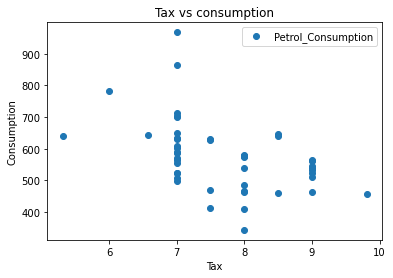

In [512]:
import matplotlib.pyplot as plt
dataset.plot(x='Petrol_tax', y='Petrol_Consumption', style='o')
plt.title('Tax vs consumption')
plt.xlabel('Tax')
plt.ylabel('Consumption')
plt.show()

In [513]:
dataset[['Petrol_tax','Petrol_Consumption']].corr()

,Petrol_tax,Petrol_Consumption
Petrol_tax,1.000000,-0.455955
Petrol_Consumption,-0.455955,1.000000


Correlation Matrix implies There is a Linear Relationship btw Petrol_tax & Petrol_Consumption

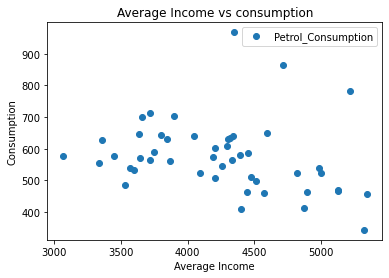

,Average_income,Petrol_Consumption
Average_income,1.000000,-0.244862
Petrol_Consumption,-0.244862,1.000000


In [514]:
dataset.plot(x='Average_income', y='Petrol_Consumption', style='o')
plt.title('Average Income vs consumption')
plt.xlabel('Average Income')
plt.ylabel('Consumption')
plt.show()
dataset[['Average_income','Petrol_Consumption']].corr()

Correlation Matrix implies There is a Linear Relationship btw Average_income & Petrol_Consumption

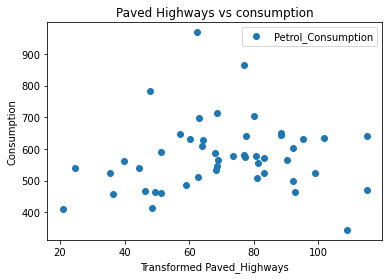

,transformed,Petrol_Consumption
transformed,1.000000,0.084753
Petrol_Consumption,0.084753,1.000000


In [515]:
import numpy as np
dataset['transformed'] = np.power(dataset['Paved_Highways'], 0.5) # transformation
dataset.plot(x='transformed', y='Petrol_Consumption', style='o')
plt.title('Paved Highways vs consumption')
plt.xlabel('Transformed Paved_Highways')
plt.ylabel('Consumption')
plt.show()
dataset[['transformed','Petrol_Consumption']].corr()

There is no linear relationship between highways and consumption; Have tried all transformations - still not able to see a good linear relationship

so, we are deleting Paved Highways column

Transformations which we tried are x^2, x^3, x^0.5, e^x and log(x)

In [516]:
del dataset['Paved_Highways'] 

In [517]:
del dataset['transformed'] 

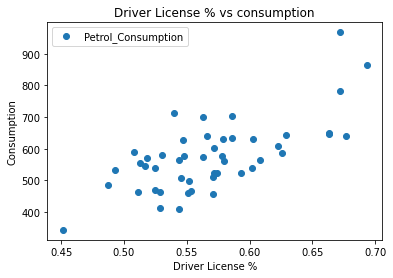

,Population_Driver_licence(%),Petrol_Consumption
Population_Driver_licence(%),1.000000,0.689301
Petrol_Consumption,0.689301,1.000000


In [518]:
dataset.plot(x='Population_Driver_licence(%)', y='Petrol_Consumption', style='o')
plt.title('Driver License % vs consumption')
plt.xlabel('Driver License %')
plt.ylabel('Consumption')
plt.show()
dataset[['Population_Driver_licence(%)','Petrol_Consumption']].corr()

Correlation Matrix implies There is a Linear Relationship btw Population_Driver_licence(%) & Petrol_Consumption

In [519]:
X = dataset[['Petrol_tax', 'Average_income', 'Population_Driver_licence(%)']].values #array of features
y = dataset['Petrol_Consumption'].values #array of targets

# 6) Splitting DATA

In [520]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

# 7) Scaling the Data

In [521]:
from sklearn.preprocessing import StandardScaler ## standard scaling 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

# 2nd JAR: TASK - SL - LINEAR REGRESSION

In [522]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

# 3rd JAR: Model

In [523]:
coeff_df = pd.DataFrame(regressor.coef_,['Petrol_tax', 'Average_income',
       'Population_Driver_licence(%)'], columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df

,Coefficient
Petrol_tax,-31.263870
Average_income,-42.589331
Population_Driver_licence(%),79.448365


In [524]:
print(f'''Model:
petrol_consumption = {round(coeff_df.iloc[0].values[0],2)} * petrol_tax + {round(coeff_df.iloc[1].values[0],2)} * avg_income +  {round(coeff_df.iloc[2].values[0],2)} * pop_driver + {round(regressor.intercept_,2)}
''')

Model:
petrol_consumption = -31.26 * petrol_tax + -42.59 * avg_income +  79.45 * pop_driver + 582.92



In [525]:
regressor.predict(scaler.transform(np.array([[8, 3500, 0.5]])))

array([517.64706073])

Relation btw Petrol_tax, Average_income & Pop_Driver_licence(%) vs petrol_consumption

In [526]:
pt=X_train_scaled[:,:1]
ai=X_train_scaled[:,1:2]
pl=X_train_scaled[:,2:3]

In [540]:
petrol_consumption = -31.26 * pt  + -42.59 * ai +  79.45* pl + 582.921052631579

In [552]:
cons=pd.DataFrame(pt)
cons.columns=['Petrol_tax']
cons['Average_income']=ai
cons['Pop_Driver_licence(%)']=pl
cons['petrol_consumption']=petrol_consumption
cons

,Petrol_tax,Average_income,Pop_Driver_licence(%),petrol_consumption
0,1.513913,-1.021129,-1.447790,464.059146
1,-1.965118,1.624077,1.862974,723.194481
2,0.354236,-1.902865,0.124360,662.771104
3,-0.805441,0.806259,2.260635,753.368049
4,-0.805441,-0.829376,-0.578483,597.461810
5,-0.225603,-1.421024,-0.449012,614.820824
6,-0.225603,-0.619596,0.142856,627.711915
7,-0.805441,-0.930989,-0.153078,635.587949
8,-0.805441,0.471921,-0.356533,559.673535
9,1.513913,-0.588456,0.161352,573.477933


# 4th JAR: LOSS

In [529]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,508,570.680345
1,635,623.180703
2,464,400.044296
3,640,674.028792
4,587,672.815589
5,460,499.496481
6,524,545.871022
7,649,717.134668
8,580,499.539093
9,487,496.589572


In [530]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 2992.76914117258


# 5th JAR Learning - Gradient Descent; is dealt in Model Jar itself

# 6th JAR Evaluation Metric

In [531]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.39152065671786573


# Feature Selection

RFE - Recursive Feature Elimination

In [532]:
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train_scaled, y_train)
list(zip(['Petrol_tax', 'Average_income', 'LogPaved_Highways',
       'Population_Driver_licence(%)'],selector.support_))

[('Petrol_tax', True), ('Average_income', True), ('LogPaved_Highways', True)]

 We can eliminate least priority features using this method

In [533]:
from sklearn.feature_selection import SequentialFeatureSelector
estimator = LinearRegression()
sfs = SequentialFeatureSelector(estimator, n_features_to_select=2)
sfs.fit(X_train_scaled, y_train)
print(list(zip(['Petrol_tax', 'Average_income', 'LogPaved_Highways',
       'Population_Driver_licence(%)'],sfs.get_support())))

[('Petrol_tax', False), ('Average_income', True), ('LogPaved_Highways', True)]


In [534]:
X_trans = sfs.transform(X)
X_trans[:5] # feature selection

array([[3.571e+03, 5.250e-01],
       [4.092e+03, 5.720e-01],
       [3.865e+03, 5.800e-01],
       [4.870e+03, 5.290e-01],
       [4.399e+03, 5.440e-01]])

We have successfully deleted Petrol Tax as it has least impact on Petrol Consumption